In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data from pg 64 http://www.police.ucsd.edu/docs/annualclery.pdf
#created data frame manually 
sexual_assaults = pd.read_csv('sexual_assaults.csv')
sexual_assaults

,Offense,Year,On-Campus Housing Facilities,On-Campus Total,Non-Campus,Public Property,Total
0,Rape,2017,8,12,0,0,12
1,Rape,2016,8,10,0,0,10
2,Rape,2015,3,7,1,0,8
3,Fondling,2017,7,10,0,1,11
4,Fondling,2016,5,7,1,0,8
5,Fondling,2015,3,7,0,2,9
6,Statutory Rape,2017,0,0,0,0,0
7,Statutory Rape,2016,0,0,0,0,0
8,Statutory Rape,2015,0,0,0,0,0
9,Dating Violence,2017,6,13,0,0,13


In [3]:
#choose columns offense, year, and total: df1
df1= sexual_assaults.loc[:,['Offense','Year','Total']]
df1.head()

,Offense,Year,Total
0,Rape,2017,12
1,Rape,2016,10
2,Rape,2015,8
3,Fondling,2017,11
4,Fondling,2016,8


In [4]:
#pivot to get offenses as columns: df_pivoted
df_pivoted = pd.pivot_table(df1, index='Year', columns='Offense', values='Total')
df_pivoted = df_pivoted.reset_index()
df_pivoted

Offense,Year,Dating Violence,Fondling,Rape,Stalking,Statutory Rape
0,2015,8,9,8,5,0
1,2016,10,8,10,9,0
2,2017,13,11,12,5,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


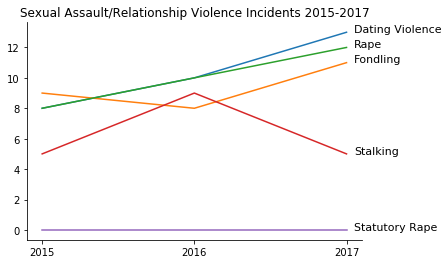

In [5]:
#column names
df_pivoted_columns = df_pivoted.columns
for i in range(0,5,1):
    plt.plot(df_pivoted['Year'], df_pivoted[df_pivoted_columns[i+1]])
    y_pos = df_pivoted.loc[2,df_pivoted_columns[i+1]]
    plt.text(2017.05, y_pos, s= df_pivoted_columns[i+1], fontsize=11) 
    
#change x ticks, add title, get rid of right/top spins
plt.xticks(np.arange(2015,2018,1))
plt.title('Sexual Assault/Relationship Violence Incidents 2015-2017')
ax = plt.subplot(111)    
ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False)   

#save the figure
plt.savefig('offense_over_time.png')

In [6]:
#get rid of year and total columns: df2
df2=sexual_assaults.iloc[:,[0,2,3,4,5]]
df2.head()

,Offense,On-Campus Housing Facilities,On-Campus Total,Non-Campus,Public Property
0,Rape,8,12,0,0
1,Rape,8,10,0,0
2,Rape,3,7,1,0
3,Fondling,7,10,0,1
4,Fondling,5,7,1,0


In [7]:
#sum all counts per location by each offense
df2_summed=df2.groupby('Offense').agg(np.sum)
df2_summed=df2_summed.reset_index()
df2_summed

,Offense,On-Campus Housing Facilities,On-Campus Total,Non-Campus,Public Property
0,Dating Violence,17,30,1,0
1,Fondling,15,24,1,3
2,Rape,19,29,1,0
3,Stalking,7,19,0,0
4,Statutory Rape,0,0,0,0


In [8]:
#melt data
df2_melt=df2_summed.melt(id_vars=('Offense'),var_name='Location',value_name='Count')
df2_melt.head()

,Offense,Location,Count
0,Dating Violence,On-Campus Housing Facilities,17
1,Fondling,On-Campus Housing Facilities,15
2,Rape,On-Campus Housing Facilities,19
3,Stalking,On-Campus Housing Facilities,7
4,Statutory Rape,On-Campus Housing Facilities,0


In [9]:
#create an array of the offenses
offense=np.unique(df2_melt['Offense'])
offense

array(['Dating Violence', 'Fondling', 'Rape', 'Stalking',
       'Statutory Rape'], dtype=object)

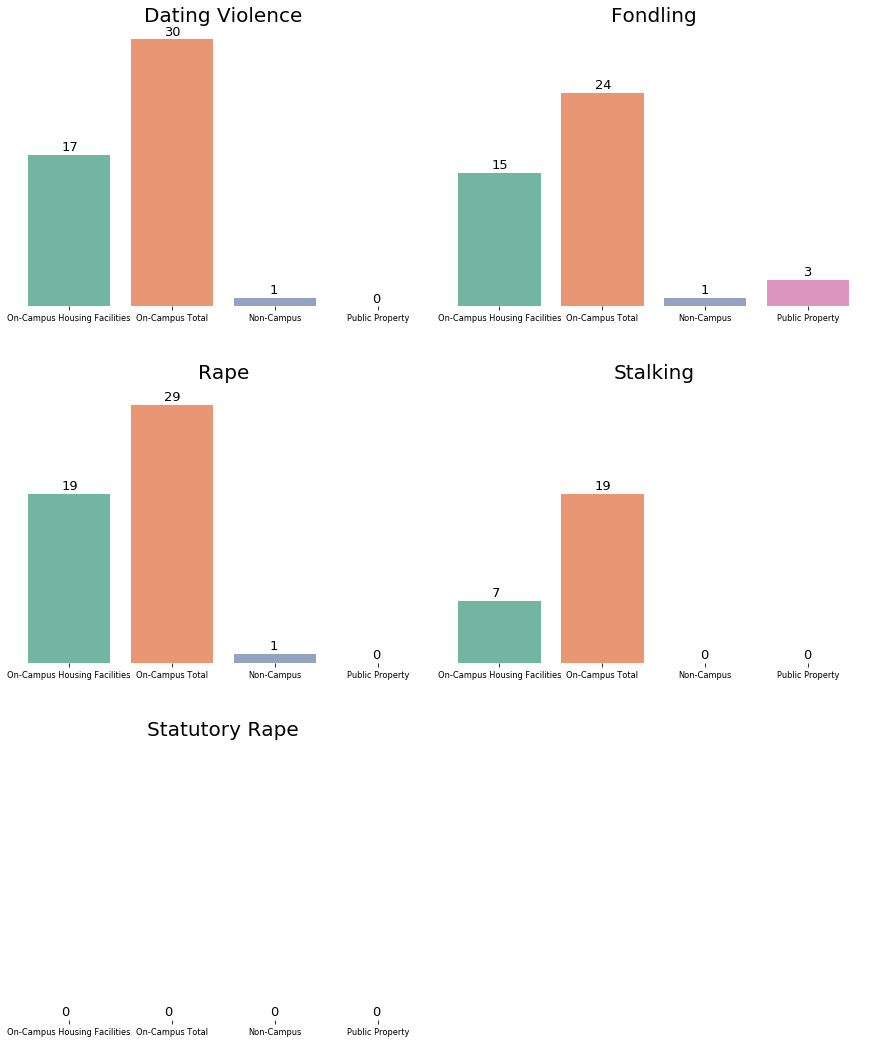

In [10]:
#set figure size
plt.figure(figsize=(12, 14))

#plot barplots displaying number of offenses by location for each offense
for i in range(0,5,1):
    #create subplots with no spines
    ax = plt.subplot(3,2,i+1)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    #fix y limits,get rid of y ticks and axis labels, set xticks fontsize
    ax.set_ylim(0,30)
    plt.yticks([])
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    plt.xticks(fontsize=8.25)
    
    #get data for each offense to plot: df3
    df3=df2_melt[df2_melt['Offense']==offense[i]]
    df3=df3.iloc[:,1:3]
    
    #plot bars for each location
    sns.barplot(x='Location',y='Count',data=df3,palette="Set2") 
    
    #create y positions for the count labels, column index 1 is 'Count'
    y_pos_1 = df3.iloc[0,1] + 0.5
    y_pos_2 = df3.iloc[1,1] + 0.5
    y_pos_3 = df3.iloc[2,1] + 0.5
    y_pos_4 = df3.iloc[3,1] + 0.5
    
    #plot the count labels
    plt.text(-0.075, y_pos_1, s= df3.iloc[0,1], fontsize=13) 
    plt.text(0.925, y_pos_2, s= df3.iloc[1,1], fontsize=13) 
    plt.text(1.95, y_pos_3, s= df3.iloc[2,1], fontsize=13) 
    plt.text(2.95, y_pos_4, s= df3.iloc[3,1], fontsize=13) 
    
    #add title, add padding between graphs
    plt.text(1.5, 32, offense[i],horizontalalignment='center',fontsize=20)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=7.0)
    
#save figure
plt.savefig('offenses_by_location.png',bbox_inches="tight")